[Датасет](https://www.kaggle.com/datasets/prokshitha/home-value-insights) для определения стоимости домов по их характеристикам.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import seaborn as sns
from impementation import *

In [2]:
def show_results(train_y, test_y, predict_train, predict_test):
    mse_train = mean_squared_error(train_y, predict_train)
    mse_test = mean_squared_error(test_y, predict_test)
    print(f"RMSE - train: {np.sqrt(mse_train)}")
    print(f"RMSE - test: {np.sqrt(mse_test)}")
    print(f"MAE - train: {mean_absolute_error(train_y, predict_train)}")
    print(f"MAE - test: {mean_absolute_error(test_y, predict_test)}")
    print(f"r2 - train: {r2_score(train_y, predict_train)}")
    print(f"r2 - test: {r2_score(test_y, predict_test)}")

In [3]:
dataset = pd.read_csv("dataset_regression.csv").dropna()
dataset.info()  # все фичи числовые

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [4]:
X = dataset.drop(columns=["House_Price"])
y = dataset["House_Price"].values.astype(int)
print(f"Цены в диапазоне от {np.min(y)} до {np.max(y)}")

Цены в диапазоне от 111626 до 1108236


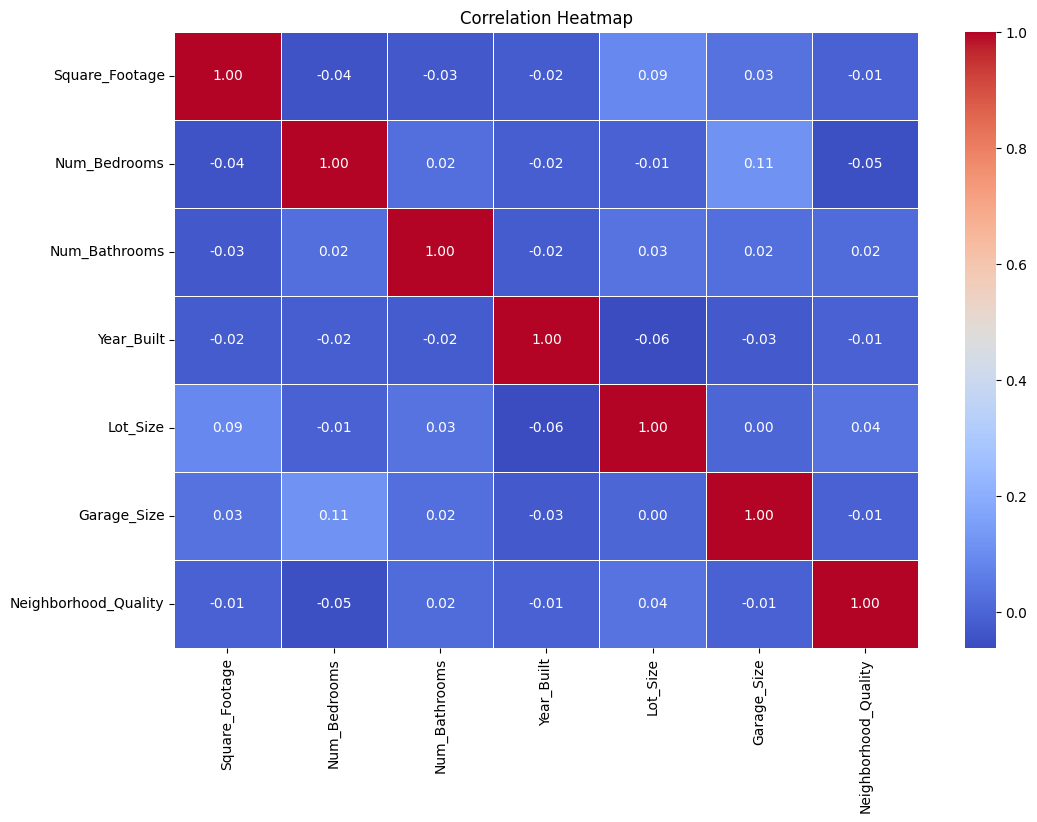

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

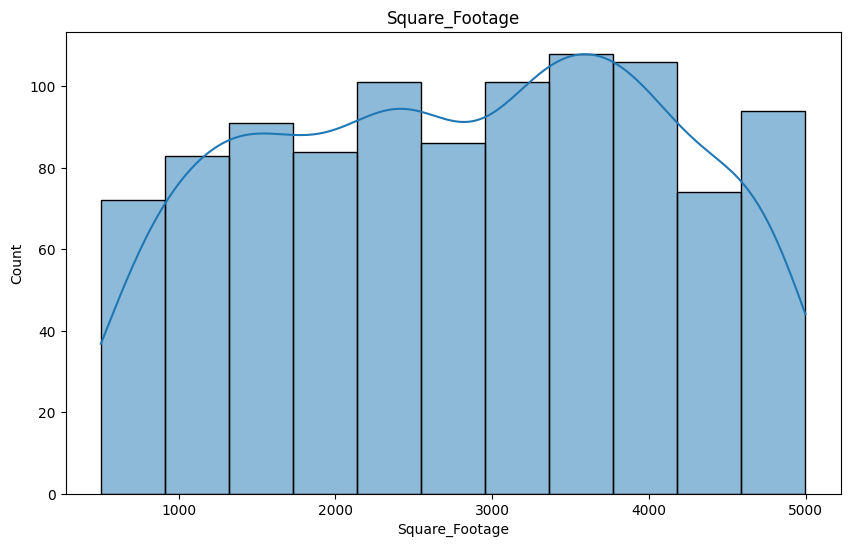

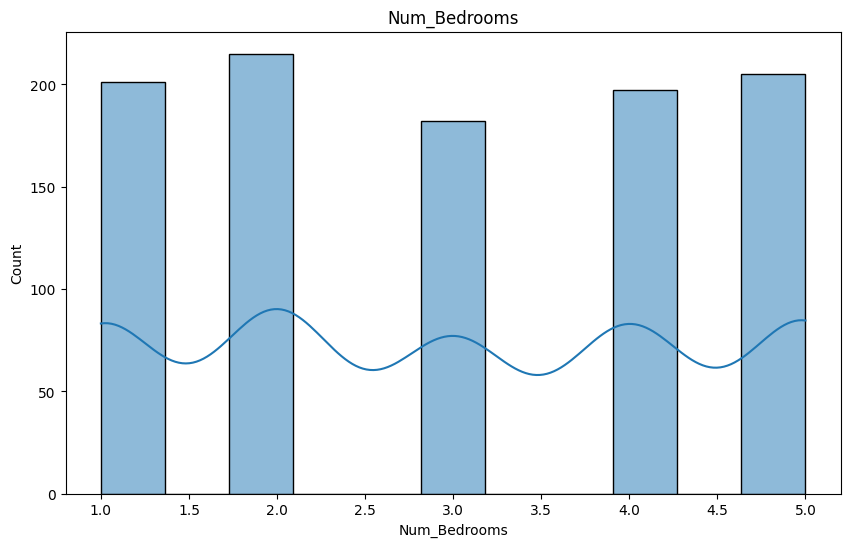

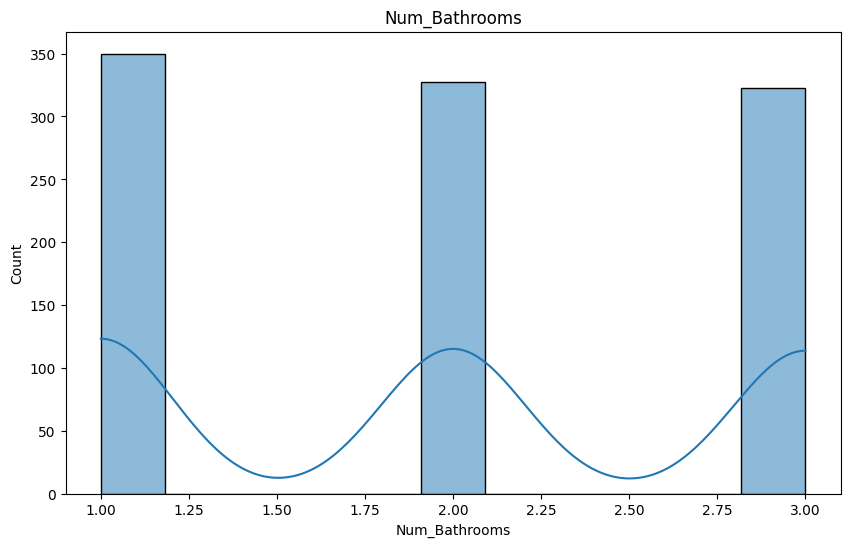

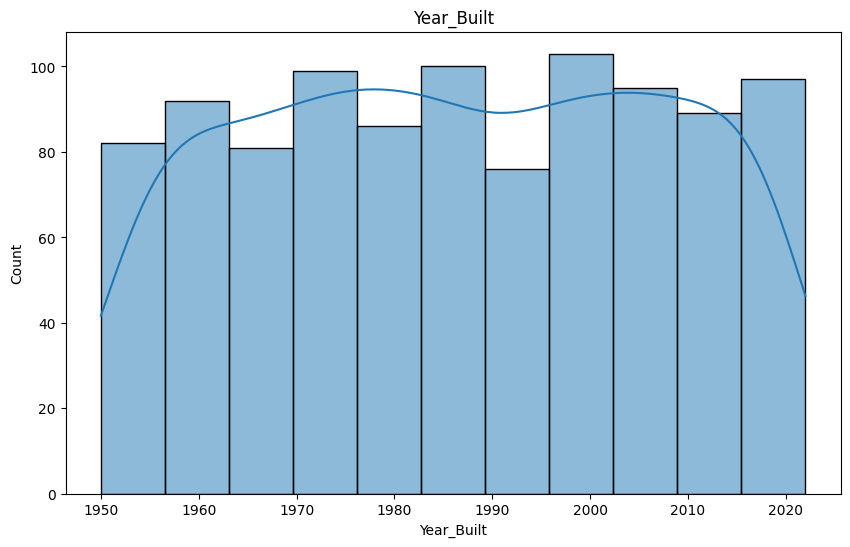

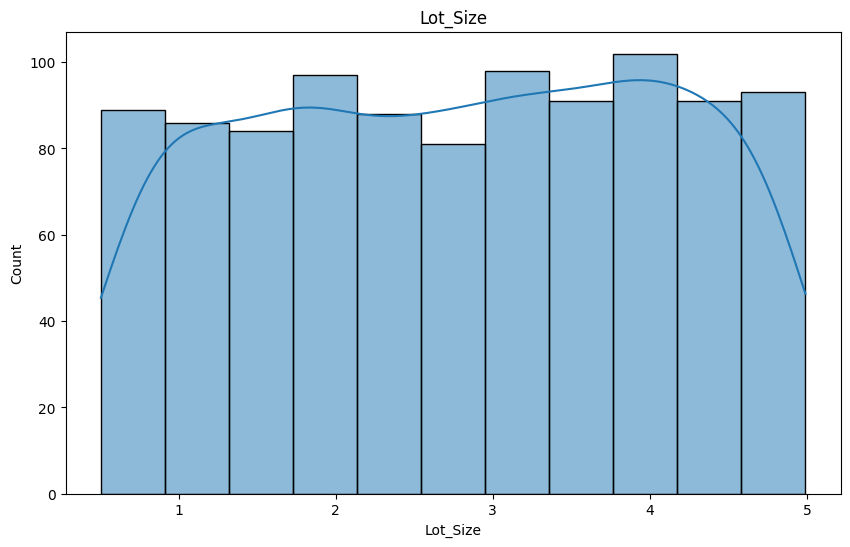

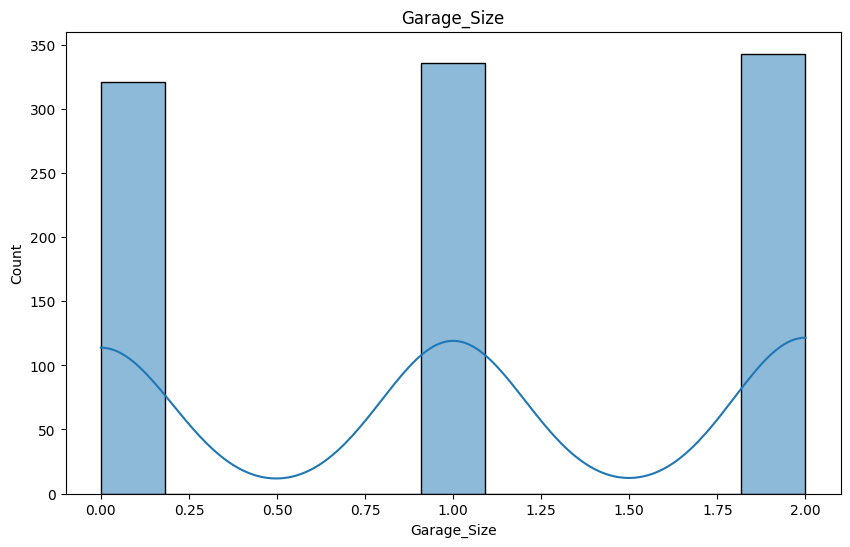

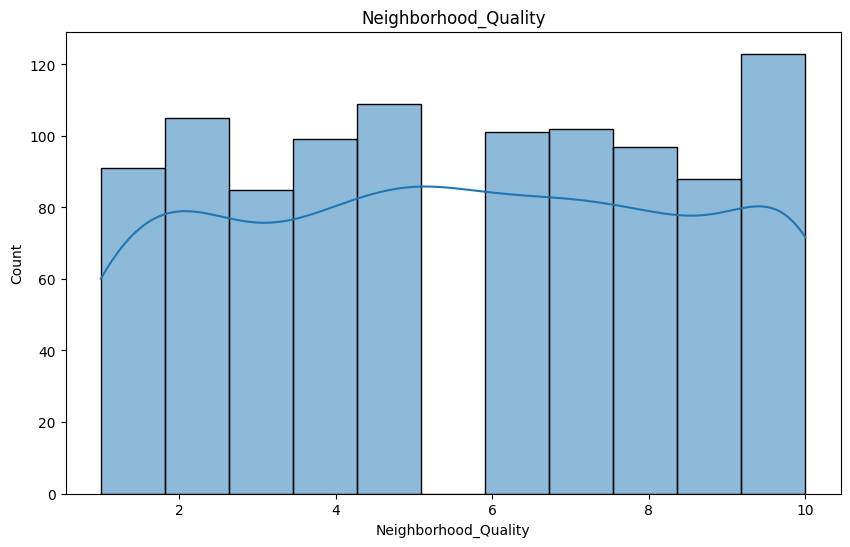

In [6]:
for col in X.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(dataset[col], kde=True)
    plt.title(f"{col}")
    plt.show()

Стандартизируем фичи и разделим датасет

In [7]:
prepared_X = StandardScaler().fit_transform(X)
train_X, test_X, train_y, test_y = train_test_split(prepared_X, y, test_size=0.2, random_state=0)

## Sklearn

In [8]:
def pipline_sklearn(regressors, params):
    n = len(regressors)
    for i in range(n):
        regressor = regressors[i]
        print(f"{regressor.__name__} default")
        model = regressor()
        model.fit(train_X, train_y)
        predict_train = model.predict(train_X)
        predict_test = model.predict(test_X)
        show_results(train_y, test_y, predict_train, predict_test)

        print(f"\n{regressor.__name__} optimized")
        model = regressor()
        clf = GridSearchCV(model, params[i], cv=2, scoring="neg_mean_squared_error", return_train_score=False, n_jobs=-1, verbose=1)
        clf.fit(train_X, train_y)
        best_model = clf.best_estimator_
        predict_train = best_model.predict(train_X)
        predict_test = best_model.predict(test_X)
        show_results(train_y, test_y, predict_train, predict_test)
        print("\n\n")

In [9]:
regressors = [KNeighborsRegressor, Ridge, DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor]
params = [
    {
        "n_neighbors": [3, 5, 7, 9], 
        "algorithm" : ["ball_tree", "kd_tree", "brute"],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski"]
    },
    {
        "alpha": [0, 0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        "criterion": ["squared_error", "friedman_mse", "absolute_error"],
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["sqrt", "log2"],
        "bootstrap": [True, False]
    },
    {
        "n_estimators": [50, 100],
        "learning_rate": [0.01, 0.1],
        "max_depth": [3, 5],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2],
        "subsample": [0.8, 1.0]
    }
]

pipline_sklearn(regressors, params)

KNeighborsRegressor default
RMSE - train: 66504.53975855821
RMSE - test: 76176.76393876153
MAE - train: 53479.82175000001
MAE - test: 62904.681000000004
r2 - train: 0.9320813569804501
r2 - test: 0.904369299646933

KNeighborsRegressor optimized
Fitting 2 folds for each of 72 candidates, totalling 144 fits
RMSE - train: 0.0
RMSE - test: 71977.0502578952
MAE - train: 0.0
MAE - test: 57619.96565689346
r2 - train: 1.0
r2 - test: 0.914623099054751



Ridge default
RMSE - train: 9754.697660589412
RMSE - test: 9926.17903158569
MAE - train: 7727.40836225471
MAE - test: 7836.194905989087
r2 - train: 0.9985387852671629
r2 - test: 0.9983762599403073

Ridge optimized
Fitting 2 folds for each of 7 candidates, totalling 14 fits
RMSE - train: 9754.697660589412
RMSE - test: 9926.17903158569
MAE - train: 7727.40836225471
MAE - test: 7836.194905989087
r2 - train: 0.9985387852671629
r2 - test: 0.9983762599403073



DecisionTreeRegressor default
RMSE - train: 0.0
RMSE - test: 31995.036924107462
MAE - train

## Implementation

In [10]:
def pipeline_implementation(models):
  for model in models:
      print(f"{model.__class__.__name__} implemented")
      model.fit(train_X, train_y)
      predict_train = model.predict(train_X)
      predict_test = model.predict(test_X)
      show_results(train_y, test_y, predict_train, predict_test)
      print("\n\n")

In [11]:
knn = KNN(k=5, task="regression")
logreg = LogRegression(lr=0.15, n_iters=5000, task="regression")
decision_tree = DecisionTree(max_depth=10, task="regression")
random_forest = RandomForest(n_trees=50, max_depth=17, task="regression")
gradient_boosting = GradientBoosting(n_estimators=60, learning_rate=0.1, max_depth=4, task="regression")

models = [knn, logreg, decision_tree, random_forest, gradient_boosting]
pipeline_implementation(models)

KNN implemented
RMSE - train: 65208.55899468528
RMSE - test: 86043.91956188188
MAE - train: 52026.219249999995
MAE - test: 69430.566
r2 - train: 0.9347026401464701
r2 - test: 0.8779907749733488



LogRegression implemented
RMSE - train: 9749.599113374303
RMSE - test: 9929.78112279548
MAE - train: 7723.442693739539
MAE - test: 7849.88425861326
r2 - train: 0.9985403123519745
r2 - test: 0.9983750812549304



DecisionTree implemented
RMSE - train: 4623.649717012443
RMSE - test: 32074.263566040157
MAE - train: 2191.9039912518037
MAE - test: 24733.80083008658
r2 - train: 0.9996717110494262
r2 - test: 0.9830462535165292



RandomForest implemented
RMSE - train: 10010.227079493377
RMSE - test: 23798.75032721856
MAE - train: 7940.6128899999985
MAE - test: 18631.131680000002
r2 - train: 0.9984612280017193
r2 - test: 0.9906661546029055



GradientBoosting implemented
RMSE - train: 618564.9102142641
RMSE - test: 617632.7108386311
MAE - train: 618506.5699999998
MAE - test: 617369.4625087088
r2 - tr